In [1]:
import pandas as pd
import time

In [2]:
#读取员工离职预测数据
data = pd.read_csv(r"C:\Users\zhouy\Desktop\数据科学技术与应用\员工离职预测训练赛\pfm_train.csv",delimiter=',')

In [ ]:
data = data.drop(['Department','BusinessTravel','EducationField','JobRole',"Gender","MaritalStatus","OverTime"],axis=1)

In [3]:
#数据降维：剔除无关变量“EmployeeNumber”(员工号码)、“Over18”（年龄是否超过18）、“StandardHours”（标准工时）
data = data.drop(['EmployeeNumber','Over18','StandardHours'],axis=1)

In [ ]:
data.head(3)

In [ ]:
data.info()

In [4]:
from sklearn.preprocessing import LabelEncoder
T=LabelEncoder() #初始化
data["BusinessTravel"]=T.fit_transform(data["BusinessTravel"])
data["Department"]=T.fit_transform(data["Department"])
data["EducationField"]=T.fit_transform(data["EducationField"])
data["Gender"]=T.fit_transform(data["Gender"])
data["JobRole"]=T.fit_transform(data["JobRole"])
data["MaritalStatus"]=T.fit_transform(data["MaritalStatus"])
data["OverTime"]=T.fit_transform(data["OverTime"])

In [ ]:
dumm_dep = pd.get_dummies( data['Department'], prefix='Department' )
dumm_bt = pd.get_dummies( data['BusinessTravel'], prefix='BusinessTravel' )
dumm_ef = pd.get_dummies( data['EducationField'], prefix='EducationField' )
dumm_jr = pd.get_dummies( data['JobRole'], prefix='JobRole' )
dumm_ms = pd.get_dummies( data['MaritalStatus'], prefix='MaritalStatus' )
dumm_ot = pd.get_dummies( data['OverTime'], prefix='OverTime' )
dumm_gd = pd.get_dummies( data['Gender'], prefix='Gender' )

In [ ]:
#保存one-hot的数据
data= data.join([dumm_dep,dumm_bt,dumm_ef,dumm_jr,dumm_ms,dumm_ot,dumm_gd], how='outer')

In [5]:
X = data.drop(['Attrition'], axis=1).values.astype(float)
y = data['Attrition'].values.astype(int)

#训练神经网络分类器模型
from sklearn.neural_network import MLPClassifier
#创建一个2层隐层，每层5个结点
mlp = MLPClassifier(solver='sgd',alpha=1e-5,hidden_layer_sizes=(5,10), random_state=1)
mlp.fit(X,y)

mlp.score(X,y)

0.8381818181818181

### 离职召回率为0？

In [6]:
from sklearn import metrics
y_predicted = mlp.predict(X)

print("Classification report for %s" % mlp)

print(metrics.classification_report(y, y_predicted) )
print( "Confusion matrix:\n", metrics.confusion_matrix(y, y_predicted) )

Classification report for MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 10), random_state=1,
              solver='sgd')
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.00      0.00      0.00       178

    accuracy                           0.84      1100
   macro avg       0.42      0.50      0.46      1100
weighted avg       0.70      0.84      0.76      1100

Confusion matrix:
 [[922   0]
 [178   0]]


C:\Users\zhouy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zhouy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zhouy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
#在测试集上进行评价
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=1)
mlp = MLPClassifier(solver='sgd',alpha=1e-5,hidden_layer_sizes=(5,5), random_state=1,activation='logistic')
#clf = tree.DecisionTreeClassifier()
mlp.fit(X_train, y_train)
print("Performance on training set:", mlp.score(X_train, y_train) )
print("Performance on test set:", mlp.score(X_test, y_test) )

Performance on training set: 0.8493506493506493
Performance on test set: 0.8121212121212121


In [8]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       268
           1       0.00      0.00      0.00        62

    accuracy                           0.81       330
   macro avg       0.41      0.50      0.45       330
weighted avg       0.66      0.81      0.73       330



C:\Users\zhouy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zhouy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zhouy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
y_pred_test=mlp.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred_test)
print(confusion_matrix)

[[268   0]
 [ 62   0]]


In [11]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import auc

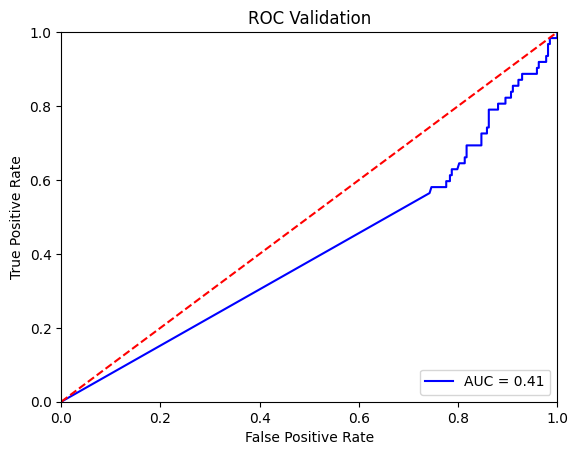

In [12]:
prob_predict_y_validation =mlp.predict_proba(X_test)
predictions_validation = prob_predict_y_validation[:, 1]
fpr, tpr, _ = roc_curve(y_test, predictions_validation)
    #
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()